In [46]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# loading the dataset
df = pd.read_csv('insurance.csv')

In [3]:
# first 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# checking duplicate values
df.duplicated().sum()

1

In [7]:
# droping duplicate values
df.drop_duplicates(inplace=True)

In [9]:
# checking the data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


# Exploratory Data Analysis

<h3>Check for outliers</h3>

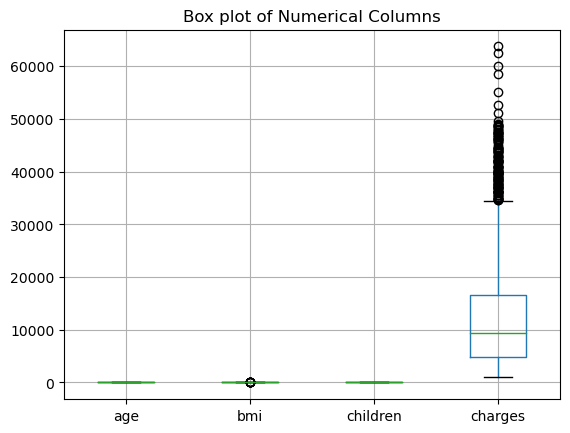

In [12]:
# Visualize box plots for numerical columns 
df.boxplot(column=['age', 'bmi', 'children', 'charges']) 
plt.title('Box plot of Numerical Columns')
plt.show()

In [33]:
# Remove outliers based on a specific threshold
df_cleaned = df[(df['charges'] < 21000) & (df['bmi'] < 46)]

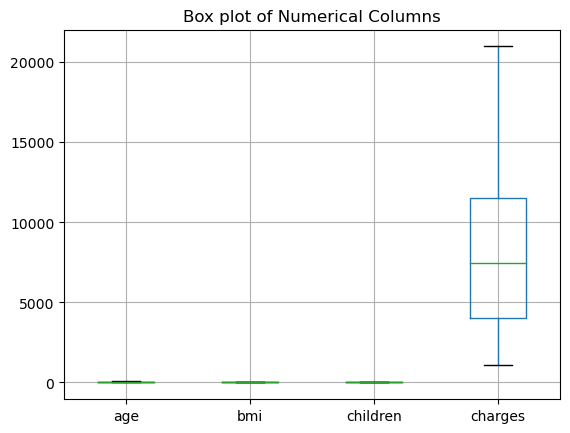

In [34]:
# visualize boxplot after removing outliers
df_cleaned.boxplot(column=['age', 'bmi', 'children', 'charges'])
plt.title('Box plot of Numerical Columns')
plt.show()

In [35]:
# Get summary statistics
df_cleaned.describe()

,age,bmi,children,charges
count,1068.000000,1068.000000,1068.000000,1068.000000
mean,38.371723,30.091910,1.076779,8159.150438
std,13.943164,5.856569,1.221375,4929.643963
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.840000,0.000000,4038.478863
50%,38.000000,29.830000,1.000000,7441.277000
75%,50.000000,33.933750,2.000000,11539.380487
max,64.000000,45.900000,5.000000,20984.093600


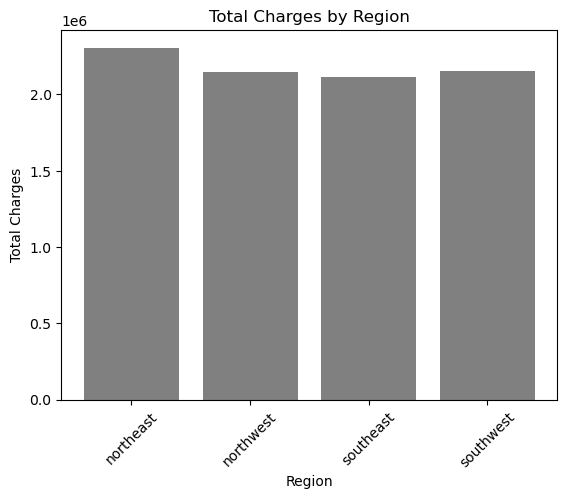

In [36]:
# Calculate the total charges by region
charges_by_region = df_cleaned.groupby('region')['charges'].sum()

# Create a bar chart
plt.bar(charges_by_region.index, charges_by_region.values, color='grey')

# Add labels and title
plt.xlabel('Region')

plt.ylabel('Total Charges')
plt.title('Total Charges by Region')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the chart
plt.show()

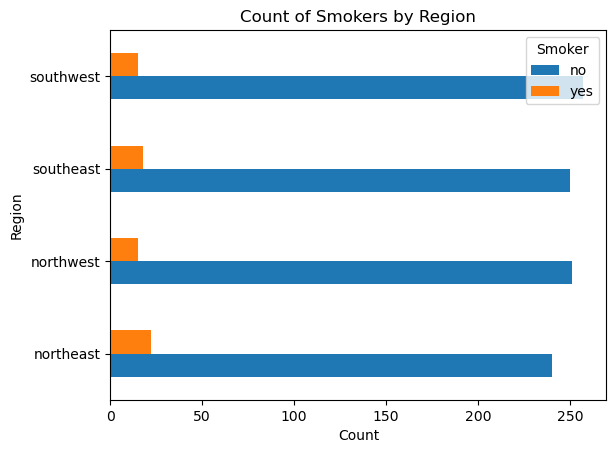

In [37]:
# Group the DataFrame by 'region' and count the occurrences of each 'smoker' value in each group
smokers_by_region = df_cleaned.groupby('region')['smoker'].value_counts().unstack().fillna(0)

# Plot a horizontal bar chart based on the grouped data
smokers_by_region.plot(kind='barh')

# Label the x-axis
plt.xlabel('Count')

# Label the y-axis
plt.ylabel('Region')

# Add a title to the plot
plt.title('Count of Smokers by Region')

# Add a legend with the title 'Smoker' in the upper right corner
plt.legend(title='Smoker', loc='upper right')

# Display the plot
plt.show()

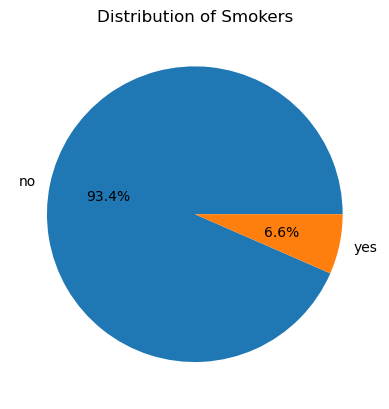

In [38]:
# Count the occurrences of each unique value in the 'smoker' column
smoker_counts = df_cleaned['smoker'].value_counts()

# Plot a pie chart using the smoker counts
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%')

# Add a title to the pie chart
plt.title('Distribution of Smokers')

# Display the pie chart
plt.show()

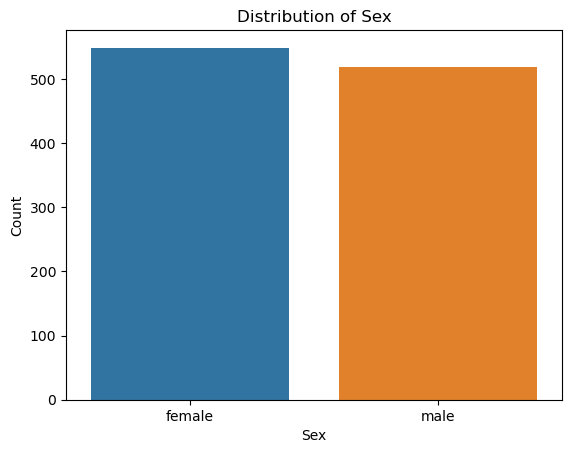

In [39]:
# Use Seaborn to create a count plot of the 'sex' column in the DataFrame
sns.countplot(x='sex', data=df_cleaned)

# Label the x-axis with 'Sex'
plt.xlabel('Sex')

# Label the y-axis with 'Count'
plt.ylabel('Count')

# Add a title to the count plot
plt.title('Distribution of Sex')

# Display the count plot
plt.show()

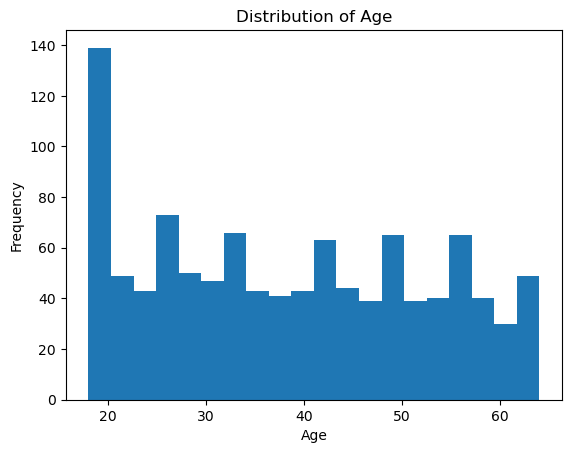

In [40]:
# Plot a histogram of the 'age' column in the DataFrame
df_cleaned['age'].plot(kind='hist', bins=20)

# Label the x-axis with 'Age'
plt.xlabel('Age')

# Add a title to the histogram
plt.title('Distribution of Age')

# Display the histogram
plt.show()

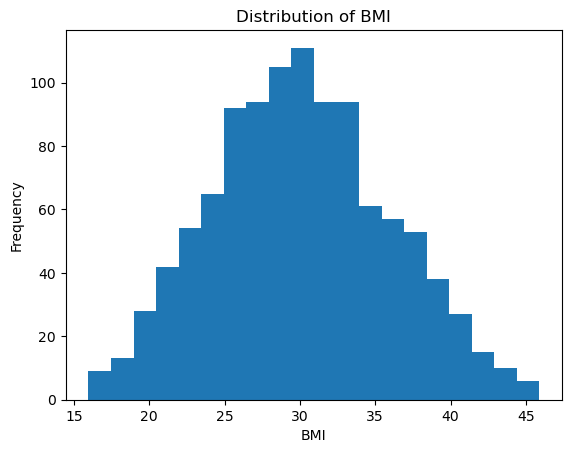

In [41]:
# Plot a histogram of the 'bmi' column in the DataFrame
df_cleaned['bmi'].plot(kind='hist', bins=20)

# Label the x-axis with 'BMI'
plt.xlabel('BMI')

# Add a title to the histogram
plt.title('Distribution of BMI')

# Display the histogram
plt.show()

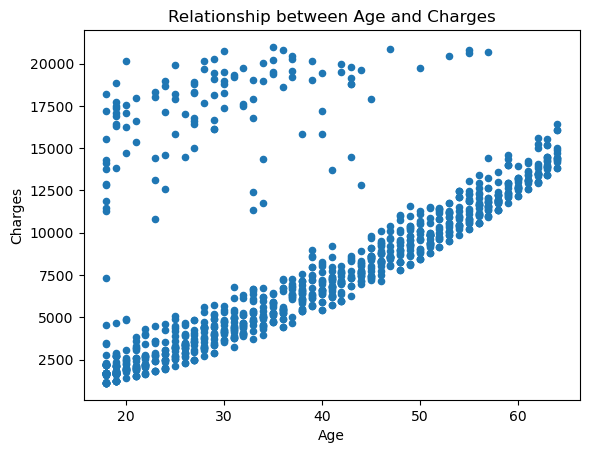

In [42]:
# Create a scatter plot of 'age' against 'charges' in the DataFrame
df_cleaned.plot(kind='scatter', x='age', y='charges')

# Label the x-axis with 'Age'
plt.xlabel('Age')

# Label the y-axis with 'Charges'
plt.ylabel('Charges')

# Add a title to the scatter plot
plt.title('Relationship between Age and Charges')

# Display the scatter plot
plt.show()

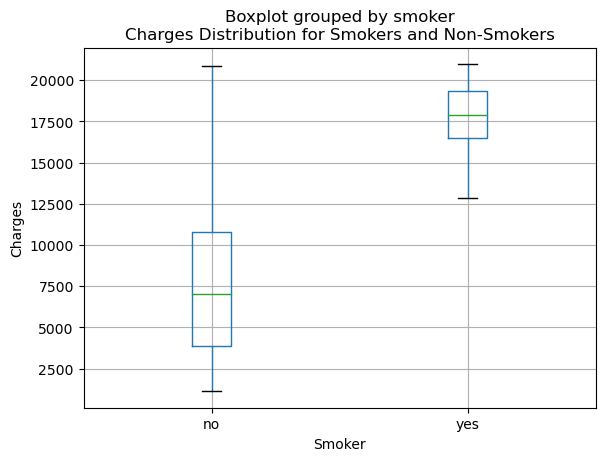

In [43]:
# Create a boxplot of 'charges' grouped by 'smoker' in the DataFrame
df_cleaned.boxplot(column='charges', by='smoker')

# Label the x-axis with 'Smoker'
plt.xlabel('Smoker')

# Label the y-axis with 'Charges'
plt.ylabel('Charges')

# Add a title to the boxplot
plt.title('Charges Distribution for Smokers and Non-Smokers')

# Display the boxplot
plt.show()

In [44]:
# Create a new column 'age_group' based on age ranges using pd.cut
df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=[0, 25, 40, 60, df_cleaned['age'].max()], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])

# Display a random sample of 5 rows from the DataFrame with the new 'age_group' column
df_cleaned.sample(5)

C:\Users\Al-Masa\AppData\Local\Temp\ipykernel_6156\3710811165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=[0, 25, 40, 60, df_cleaned['age'].max()], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])


,age,sex,bmi,children,smoker,region,charges,age_group
412,26,female,17.195,2,yes,northeast,14455.64405,Adult
1306,29,female,21.850,0,yes,northeast,16115.30450,Adult
388,26,female,22.610,0,no,northwest,3176.81590,Adult
341,62,male,30.020,0,no,northwest,13352.09980,Senior
221,53,female,33.250,0,no,northeast,10564.88450,Middle-aged


In [45]:
# Create dummy variables for the 'region' column using one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=['region'], prefix='region', dtype=int)

# Display a random sample of 5 rows from the DataFrame with the new dummy variables
df_encoded.sample(5)

,age,sex,bmi,children,smoker,charges,age_group,region_northeast,region_northwest,region_southeast,region_southwest
234,39,male,24.510,2,no,6710.19190,Adult,0,1,0,0
446,60,male,29.640,0,no,12730.99960,Middle-aged,1,0,0,0
1214,27,female,31.255,1,no,3956.07145,Adult,0,1,0,0
858,25,female,32.230,1,no,18218.16139,Young,0,0,1,0
414,19,female,35.150,0,no,2134.90150,Young,0,1,0,0


In [47]:
# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Use LabelEncoder to encode the 'smoker' column and create a new 'smoker_encoded' column
df_encoded['smoker_encoded'] = label_encoder.fit_transform(df_encoded['smoker'])

# Display a random sample of 5 rows from the DataFrame with the new 'smoker_encoded' column
df_encoded.sample(5)

,age,sex,bmi,children,smoker,charges,age_group,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded
247,24,male,35.860,0,no,1986.93340,Young,0,0,1,0,0
318,44,female,27.645,0,no,7421.19455,Middle-aged,0,1,0,0,0
363,21,female,26.400,1,no,2597.77900,Young,0,0,0,1,0
963,46,male,24.795,3,no,9500.57305,Middle-aged,1,0,0,0,0
568,49,female,31.900,5,no,11552.90400,Middle-aged,0,0,0,1,0


In [48]:
# Use LabelEncoder to encode the 'sex' column and create a new 'sex_encoded' column
df_encoded['sex_encoded'] = label_encoder.fit_transform(df_encoded['sex'])

# Display a random sample of 5 rows from the DataFrame with the new 'sex_encoded' column
df_encoded.sample(5)

,age,sex,bmi,children,smoker,charges,age_group,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded,sex_encoded
478,21,male,36.850,0,no,1534.30450,Young,0,0,1,0,0,1
386,58,female,39.050,0,no,11856.41150,Middle-aged,0,0,1,0,0,0
831,36,female,25.840,0,no,5266.36560,Adult,0,1,0,0,0,0
595,46,female,33.725,1,no,8823.98575,Middle-aged,1,0,0,0,0,0
533,37,male,36.190,0,no,19214.70553,Adult,0,0,1,0,0,1


In [49]:
# Drop the original 'sex' and 'smoker' columns from the DataFrame
df_encoded = df_encoded.drop(['sex', 'smoker'], axis=1)

In [50]:
df_encoded.head()

,age,bmi,children,charges,age_group,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded,sex_encoded
0,19,27.90,0,16884.9240,Young,0,0,0,1,1,0
1,18,33.77,1,1725.5523,Young,0,0,1,0,0,1
2,28,33.00,3,4449.4620,Adult,0,0,1,0,0,1
4,32,28.88,0,3866.8552,Adult,0,1,0,0,0,1
5,31,25.74,0,3756.6216,Adult,0,0,1,0,0,0


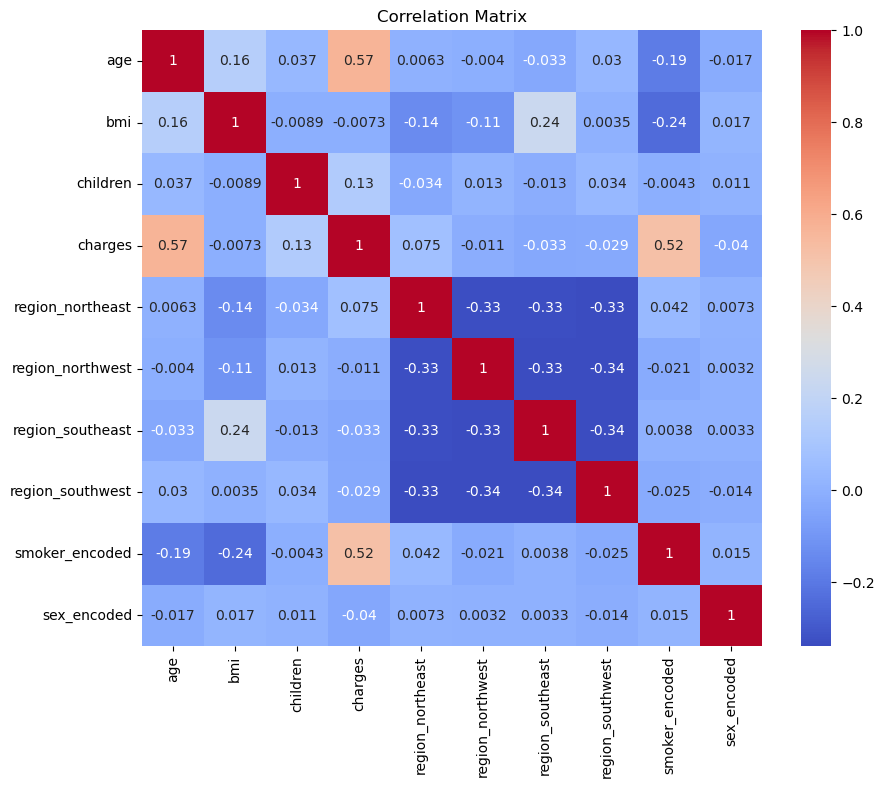

Relevant features based on correlation:
['age', 'smoker_encoded']


In [51]:
# Select numerical columns excluding 'age_group'
numr_cols = [x for x in df_encoded.columns if x not in ['age_group']]

# Calculate the correlation matrix for numerical columns
corr_matrix = df_encoded[numr_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Identify relevant features based on correlation
threshold = 0.3
relevant_features = corr_matrix[(corr_matrix['charges'].abs() > threshold) & (corr_matrix.index != 'charges')].index.tolist()
print("Relevant features based on correlation:")
print(relevant_features)

In [52]:
# Select features 'age' and 'smoker_encoded' as independent variables (X) and 'charges' as the target variable (y)
X = df_encoded[['age', 'smoker_encoded']]
y = df_encoded['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

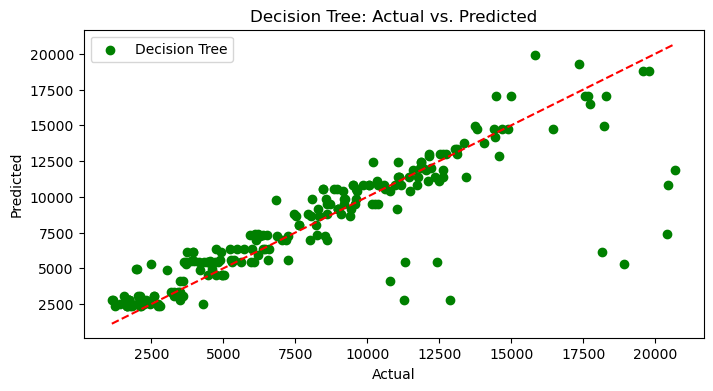

In [53]:
# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_mae = mean_absolute_error(y_test, dt_predictions)

# Plot actual vs. predicted values for # Select features 'age' and 'smoker_encoded' as independent variables (X) and 'charges' as the target variable (y)
X = df_encoded[['age', 'smoker_encoded']]
y = df_encoded['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Select features 'age' and 'smoker_encoded' as independent variables (X) and 'charges' as the target variable (y)
X = df_encoded[['age', 'smoker_encoded']]
y = df_encoded['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Decision Tree
plt.figure(figsize=(8, 4))
plt.scatter(y_test, dt_predictions, color='green', label='Decision Tree')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Decision Tree: Actual vs. Predicted') 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

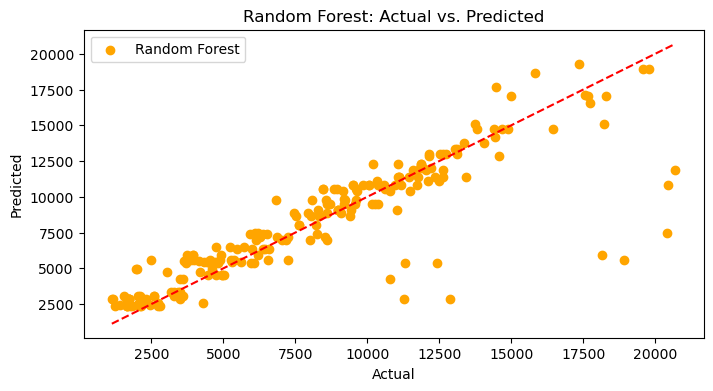

In [54]:
# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)

# Plot actual vs. predicted values for Random Forest
plt.figure(figsize=(8, 4))
plt.scatter(y_test, rf_predictions, color='orange', label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Random Forest: Actual vs. Predicted') 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

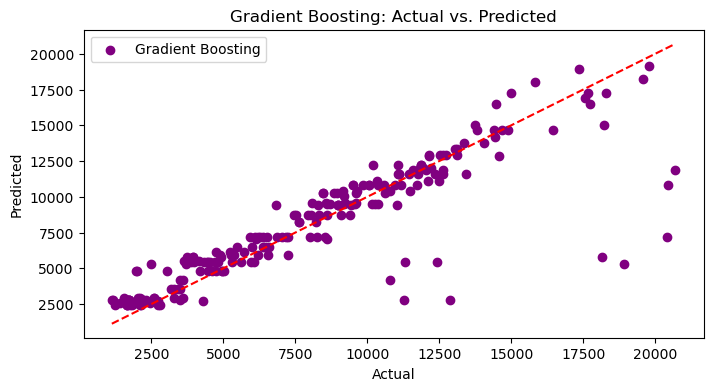

In [57]:
# Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)

# Plot actual vs. predicted values for Gradient Boosting
plt.figure(figsize=(8, 4))
plt.scatter(y_test, gb_predictions, color='purple', label='Gradient Boosting')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Gradient Boosting: Actual vs. Predicted') 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [63]:
# Print the evaluation metrics
print("Decision Tree - MSE: \t ", dt_mse)
print("Decision Tree - MAE: \t ", dt_mae)
print('----------------------------------------------------')
print("Random Forest - MSE: \t ", rf_mse)
print("Random Forest - MAE: \t ", rf_mae)
print('----------------------------------------------------')
print("Gradient Boosting - MSE: ", gb_mse)
print("Gradient Boosting - MAE: ", gb_mae)

Decision Tree - MSE: 	  5728632.311218643
Decision Tree - MAE: 	  1275.0243094744608
----------------------------------------------------
Random Forest - MSE: 	  5676403.868180047
Random Forest - MAE: 	  1270.4658701447586
----------------------------------------------------
Gradient Boosting - MSE:  5620075.226137549
Gradient Boosting - MAE:  1234.9739469039018


In [65]:
# Decision Tree
print("Decision Tree:")

# Feature importances
importance = dt_model.feature_importances_ 

for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}") 

print('----------------------------------------------------')

# Random Forest
print("Random Forest:")

# Feature importances
importance = rf_model.feature_importances_

for i, feature in enumerate(X.columns): 
    print(f"{feature}: {importance[i]}")

print('----------------------------------------------------')

# Gradient Boosting
print("Gradient Boosting:")

# Feature importances
importance = gb_model.feature_importances_ 
for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}")

Decision Tree:
age: 0.6283321204573399
smoker_encoded: 0.37166787954265995
----------------------------------------------------
Random Forest:
age: 0.6122853279702156
smoker_encoded: 0.3877146720297844
----------------------------------------------------
Gradient Boosting:
age: 0.619925223587121
smoker_encoded: 0.38007477641287896
